# Actividad - Estadística básica

* **Nombre:** Diego Antonio Garcia Padilla
* **Matrícula:** A01710777

**Entregar:** Archivo PDF de la actividad, así como el archivo .ipynb en tu repositorio.
**Nota:** Recuerda habrá una penalización de **50** puntos si la actividad fue entregada fuera de la fecha límite.

Carga el conjunto de datos `bestsellers with categories.csv` (se encuentra en el repositorio de la clase) y realiza un análisis estadístico de las variables.

In [1]:
# Carga las librerías necesarias.

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import plotly.express as px

In [2]:
# Carga el conjunto de datos al ambiente de Google Colab y muestra los primeros
# 6 renglones.

df = pd.read_csv('datasets/bestsellers with categories.csv')
df.head(6)

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction
5,A Dance with Dragons (A Song of Ice and Fire),George R. R. Martin,4.4,12643,11,2011,Fiction


El conjunto de datos es una tabla que contiene el top 50 de los libros más vendidos por Amazon por año desde 2009 hasta 2019. Cada libro está clasificado como Ficción o No ficción.

Las variables que contiene son:
* **Name**: Nombre del libro.
* **Author**: Autor.
* **User Rating**: Calificación promedio que los usuarios asignaron al libro (1-5).
* **Reviews**: Número de reseñas.
* **Price**: Precio del libro.
* **Year**: Año de publicación.
* **Genre**: Género literario (ficción/no ficción).

## Análisis estadístico
1. Carga la tabla de datos y haz un análisis estadístico de las variables.
* Verifica la cantidad de datos que tienes, las variables que contiene cada vector de datos e identifica el tipo de variables.
* Analiza las variables para saber que representa cada una y en que rangos se encuentran. Si la descripción del problema no te lo indica, utiliza el máximo y el mínimo para encontrarlo.
* Basándote en la media, mediana y desviación estándar de cada variable, ¿qué conclusiones puedes entregar de los datos?
* Calcula la correlación de las variables que consideres relevantes.

Cantidad de datos:  550 

Análisis estadístico descriptivo de los datos: 
             count          mean           std   min     25%     50%       75%      max
User Rating  550.0      4.618364      0.226980   3.3     4.5     4.7      4.80      4.9
Reviews      550.0  11953.281818  11731.132017  37.0  4058.0  8580.0  17253.25  87841.0
Price        550.0     13.100000     10.842262   0.0     7.0    11.0     16.00    105.0 

Análisis de la correlación de los datos: 


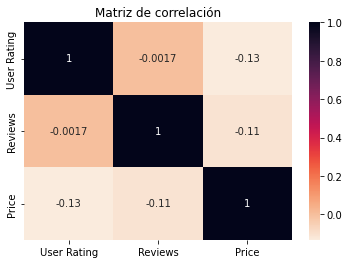

In [3]:
# Escribe el código necesario para realizar el análisis estadístico descrito 
# anteriorment.

df_num = df[['User Rating', 'Reviews', 'Price']]

print("Cantidad de datos: ", len(df), "\n")

print("Análisis estadístico descriptivo de los datos: ")
print(df_num.describe().T.to_string(), "\n")

print("Análisis de la correlación de los datos: ")
sns.heatmap(df_num.corr(), annot=True, cmap='rocket_r')
plt.title('Matriz de correlación')
plt.show()


#### Conclusiones.

Con las medidas de tendencia central y dispersión, así como con la correlación entre variables, podemos concluir que:
- La mayoría de las variables numéricas muestran poca variabilidad, ya que su desviación estándar es muy pequeña. No obstante, la variable `Reviews` muestra una mayor variabilidad, ya que su desviación estándar es mayor a las demás.
- La variable `User Rating` tiene una correlación positiva con la variable `Reviews`, lo que indica que los libros con mayor calificación promedio también tienen mayor número de reseñas.
- La variable `Price` tiene una correlación negativa con la variable `Reviews`, lo que indica que los libros con mayor precio tienen menor número de reseñas.
- La variable `Price` tiene una correlación negativa con la variable `User Rating`, lo que indica que los libros con mayor precio tienen menor calificación promedio.


¿Cuáles son las variables relevantes e irrelevantes para el análisis?

Las variables relevantes para el análisis son:
- `User Rating`
- `Reviews`
- `Price`

Las variables irrelevantes para el análisis son:
- `Name`
- `Author`

Esto se debe a que las variables `Name` y `Author` no aportan información relevante para el análisis, ya que, además de que no son numéricas, no tienen una relación con las variables relevantes.

## Análisis gráfico

Realiza el análisis de las variables usando diagramas de cajas y bigotes, histogramas y mapas de calor.

Responde las siguientes preguntas:
* ¿Hay alguna variable que no aporta información? Si tuvieras que eliminar variables, ¿cuáles quitarías y por qué?

Las variables que no aportan información son `Name` y `Author`. Esto se debe a que no aportan información relevante para el análisis, ya que, además de que no son numéricas, no tienen una relación con las variables relevantes.

* ¿Existen variables que tengan datos extraños?

Las variable `Price` tienen datos extraños. Esto se debe a que, en la variable `Price`, hay libros con precio de 0, lo que no tiene sentido.

* Si comparas las variables, ¿todas están en rangos similares? ¿Crees que esto afecte?

No todas las variables están en rangos similares. La variable `User Rating` está en un rango de 1 a 5, mientras que la variable `Reviews` está en un rango de 37 a 87841. Esto afecta, ya que, al tener rangos diferentes, las variables con rangos más grandes tienen mayor influencia en el análisis.

* ¿Puedes encontrar grupos qué se parezcan? ¿Qué grupos son estos?

Podríamos decir que los grupos que se parecen son los libros de ficción y los libros de no ficción.

Haz un análisis estadístico de los datos antes de empezar con la segmentación. Debe contener al menos:
* 1 gráfico de caja (boxplot)
* 1 mapa de calor
* 1 gráfico de dispersión
   
Describe brevemente las conclusiones que se pueden obtener con las gráficas.

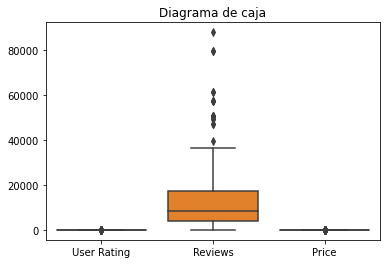

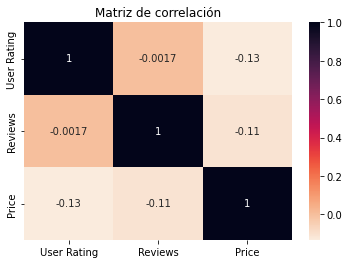

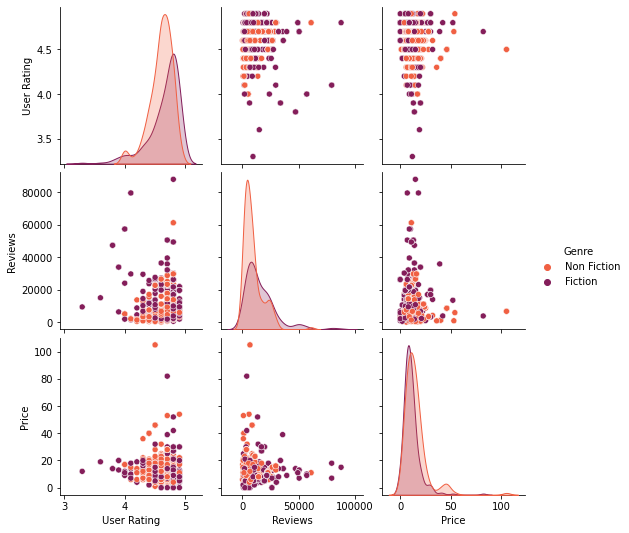

In [4]:
# Diagrama de caja

sns.boxplot(data=df_num)
plt.title('Diagrama de caja')
plt.show()

# Mapa de calor

sns.heatmap(data=df_num.corr(), annot=True, cmap='rocket_r')
plt.title('Matriz de correlación')
plt.show()

# Gráfico de dispersión

sns.pairplot(data=df[['User Rating', 'Reviews', 'Price', 'Genre']], hue='Genre', palette='rocket_r')
plt.show()

Algunas variables parecen tener cierta correlación, como es el caso de `User Rating` y `Reviews`, y de `Price` y `Reviews`. Esto se puede ver en el mapa de calor, donde se observa que las variables `User Rating` y `Reviews` tienen una correlación positiva, y las variables `Price` y `Reviews` tienen una correlación negativa.

## Clústering

Una vez que hayas realizado un análisis preliminar, haz una segmentación utilizando el método de K-Means. Justifica el número de clusters que elegiste.

* Determina un valor de $k$

Para determinar un valor de $k$, usé el método del codo y el método de la silueta. Tanto el método del codo como el método de la silueta indican que el valor de $k$ óptimo es 4, por lo que elegí ese valor.

* Calcula los centros de los grupos resultantes del algoritmo k-means

Basado en los centros responde las siguientes preguntas

- ¿Crees que estos centros puedan ser representativos de los datos? ¿Por qué?

Sí, creo que estos centros pueden ser representativos de los datos, ya que, al ser los centros de los grupos, se puede decir que los datos que pertenecen a cada grupo son similares a los datos del centro.

- ¿Cómo obtuviste el valor de $k$ a usar?

A través del método del codo y el método de la silueta.

- ¿Los centros serían más representativos si usaras un valor más alto? ¿Más bajo?

No, ya que, si se usan valores más altos, se obtendrían más grupos muy similares entre sí, y si se usan valores más bajos, se obtendrían grupos con valores muy diferentes entre sí.

- ¿Qué pasaría con los centros si tuviéramos muchos outliers en el análisis de cajas y bigotes?

Si tuviéramos muchos outliers en el análisis de cajas y bigotes, los centros se desplazarían hacia los valores más altos, ya que los outliers se encuentran en los valores más altos.

- ¿Qué puedes decir de los datos basándose en los centros?

Los datos del mismo grupo son similares entre sí, ya que, al ser los centros de los grupos, se puede decir que los datos que pertenecen a cada grupo son similares a los datos del centro.

#### Normalización de datos

In [5]:
# Implementa el algoritmo de kmeans y justifica la elección del número de 
# clusters. Usa las variables numéricas.

# Escalado de datos

numeric_cols = df_num.columns
X = df_num

scaler = StandardScaler()
X_norm = scaler.fit_transform(X)

X_norm = pd.DataFrame(X_norm, columns=numeric_cols)
X_norm.head()

,User Rating,Reviews,Price
0,0.359990,0.460453,-0.470810
1,-0.080978,-0.844786,0.821609
2,0.359990,0.599440,0.175400
3,0.359990,0.808050,-0.655441
4,0.800958,-0.365880,-0.101547


#### K-Means

C:\Users\gpdie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\gpdie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\gpdie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\U

Text(0.5, 1.0, 'Silhouette Score')

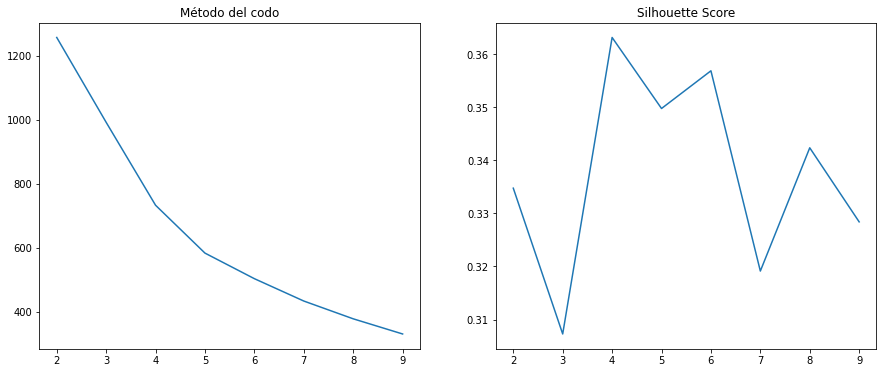

In [6]:
kmax = 10
grupos = range(2, kmax)
wcss = []
sil_score = []

# Ciclo para calcular KMeans para cada valor de k

for k in grupos:
    # Clustering
    model = KMeans(n_clusters=k, random_state = 47)

    # Obtener las etiquetas
    clusters = model.fit_predict(X_norm)

    # Guardar WCSS
    wcss.append(model.inertia_)

    # Guardar Silhouette Score
    sil_score.append(silhouette_score(X_norm, clusters))

# Graficaremos el codo y silhouette score en la misma gráfica. Recorda que 
# subplots nos permite tener más gráficas en la misma figura.
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Primera figura es el codo
axs[0].plot(grupos, wcss)
axs[0].set_title('Método del codo')

# La segunda es el Silhouette Score
axs[1].plot(grupos, sil_score)
axs[1].set_title('Silhouette Score')

In [7]:
# Dado a que 4 es el número de grupos que nos da el mejor Silhouette Score, usaremos 4 clusters.

model = KMeans(n_clusters=4, random_state=47)
clusters = model.fit_predict(X_norm)

# Agregamos los clusters a nuestros DATOS ORIGINALES
df['Grupo'] = clusters.astype('str')
df_num['Grupo'] = clusters.astype('str')
df.head()

C:\Users\gpdie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\gpdie\AppData\Local\Temp\ipykernel_8180\3455312879.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num['Grupo'] = clusters.astype('str')


,Name,Author,User Rating,Reviews,Price,Year,Genre,Grupo
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction,0
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction,2
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction,0
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction,0
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction,2


Analiza las características de cada grupo. ¿Qué nombre le pondrías a cada segmento?

- Grupo 0: Libros con pocos review, muy bajo precio y calificaciones altas.
- Grupo 1: Libros con muchos review, precio medio y calificaciones bajas.
- Grupo 2: Libros con muchos review, precio medio y calificaciones altas.
- Grupo 3: Libros con pocos review, precio alto y calificaciones bajas.

In [12]:
# Haz un análisis por grupo para determinar las características que los hace 
# únicos. Ten en cuenta todas las variables numéricas.

df_num.groupby('Grupo').describe().T

Grupo                         0             1             2             3
User Rating count    130.000000     84.000000    310.000000     26.000000
            mean       4.693846      4.232143      4.698065      4.538462
            std        0.184161      0.208933      0.118770      0.144435
            min        4.000000      3.300000      4.500000      4.300000
            25%        4.600000      4.100000      4.600000      4.500000
            50%        4.700000      4.300000      4.700000      4.500000
            75%        4.800000      4.400000      4.800000      4.575000
            max        4.900000      4.400000      4.900000      4.900000
Reviews     count    130.000000     84.000000    310.000000     26.000000
            mean   27444.646154   8631.666667   6753.977419   7219.538462
            std    12779.526505   9097.337152   4145.890023   6978.798305
            min    16643.000000    440.000000     37.000000    807.000000
            25%    21474.250000   3335.500000   3477.000000   1851.000000
            50%    23308.000000   5624.500000   6045.500000   7629.500000
            75%    27008.750000  11616.000000   9372.000000   8580.000000
            max    87841.000000  47265.000000  19735.000000  35799.000000
Price       count    130.000000     84.000000    310.000000     26.000000
            mean       9.084615     12.416667     11.900000     49.692308
            std        3.833825      5.013736      6.819423     18.750508
            min        0.000000      2.000000      0.000000     32.000000
            25%        6.000000      8.750000      7.000000     40.000000
            50%        8.000000     13.000000     10.000000     46.000000
            75%       11.000000     17.000000     16.000000     46.000000
            max       18.000000     22.000000     30.000000    105.000000

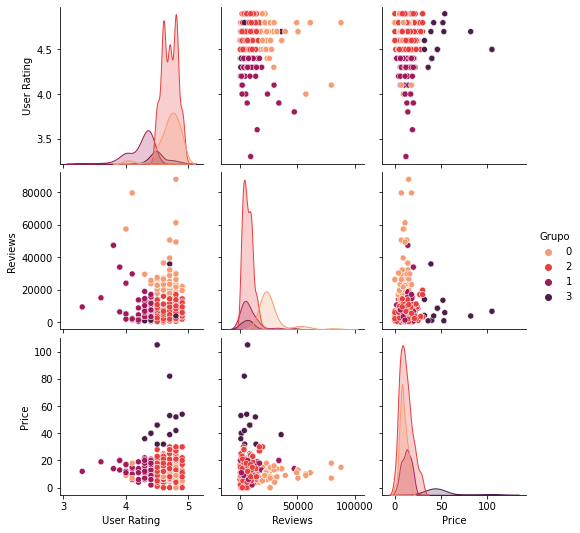

In [9]:
# Grafica los grupos con un pairplot y con un scatterplot en 3D 
# (si es necesario). Analiza las características de cada grupo.

# Pairplot

sns.pairplot(data=df_num, hue='Grupo', palette='rocket_r')
plt.show()

# Scatterplot 3D

fig = px.scatter_3d(df_num, x='User Rating', y='Reviews', z='Price', color='Grupo', opacity=0.7, title='Grupos', color_discrete_sequence=px.colors.qualitative.D3)
fig.show()